In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Normal distribution
* Skewness and Kurtosis
* Central Limit theorem
* Confidence Interval
* Test hypothesis
* Level of significance
* P value
* Type I and Type II error

### Normal Distribution

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

<img src = "https://www.statisticshowto.com/wp-content/uploads/2013/09/normal-distribution-probability.jpg" alt = "Normal distribution"/>

Real life examples of Normal distribution are:
* Human heights (people of the same gender and age group typically cluster around average with normal distribution)
* IQ scores (the mean is typically 100, SD = 15)
* Measure of blood pressure (mean = 120/80, SD = 20)

While training machine learning models, the normal distribution is very important because it helps normalize the data. Many machine learning algorithms assume normal distribution in the data. If you have normally distributed inputs, use a normal probability function to calculate them. If your inputs are not normally distributed, transform them by applying log or square root transformations until they become normally distributed before feeding into an algorithm that assumes normal distribution (such as linear regression).

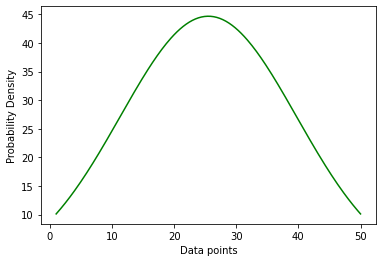

In [43]:
# Probability density function (PDF) is a statistical expression that defines a probability distribution 
# (the likelihood of an outcome) for a discrete random variable (e.g., a stock or ETF) 
# as opposed to a continuous random variable.

# generate some numbers between 1 and 50
x = np.linspace(1,50,200)

# calculate the mean and standard deviation
mean, sd = np.mean(x), np.std(x)

# find the probability density
def probability_density(arr , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((arr-mean)/sd)**2)
    return prob_density

density = probability_density(x, mean , sd)

#Plotting the Results
plt.plot(x, density, color = 'green')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.show()

### Skewness and Kurtosis

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

Understanding shape of data is important as it helps to understand where the most information is lying and analyze the outliers in a given data.

<img src = "https://www.allaboutcircuits.com/uploads/articles/understanding-the-normal-distribution-parametric-tests-skewness-and-kurtosis-rk-aac-image2.jpg" alt = "Skewness"/>

Skewness can be a positive or negative number (or zero). Distributions that are symmetrical with respect to the mean, such as the normal distribution, have zero skewness. A distribution that “leans” to the right has negative skewness, and a distribution that “leans” to the left has positive skewness.

### Kurtosis

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

We use kurtosis to quantify a phenomenon’s tendency to produce values that are far from the mean. There are various ways to describe the information that kurtosis conveys about a data set: “tailedness” (note that the far-from-the-mean values are in the distribution’s tails), “tail magnitude” or “tail weight,” and “peakedness”

<img src = "https://editor.analyticsvidhya.com/uploads/57983kurt1.png" alt = "Kurtosis"/>

### Central Limit Theorem

In probability theory, the central limit theorem (CLT) states that the distribution of a sample variable approximates a normal distribution (i.e., a “bell curve”) as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population's actual distribution shape. 

Put another way, CLT is a statistical premise that, given a sufficiently large sample size from a population with a finite level of variance, the mean of all sampled variables from the same population will be approximately equal to the mean of the whole population.

As a general rule, sample sizes of around 30-50 are deemed sufficient for the CLT to hold, meaning that the distribution of the sample means is fairly normally distributed. Therefore, the more samples one takes, the more the graphed results take the shape of a normal distribution.

In [45]:
# Let's the take the pupulation of a small town (say 8000) with the age range of 1 to 130
population = np.random.randint(1, 130, 8000)

# now let's create a small sample (of say 40, 1000, 5000) form this population and find the mean age for the samples
# with the assumption that the size of each sample is the specified subset (in percentage) of the population

def limit_plot(data, sample_size, sample_pct):
    # list to hold the sample mean
    sample_mean_age = []
    
    # compute the proportion of the population to consider
    sample_proportion = int(sample_pct * len(data))
    
    # iterate through the data to compute the sample means of the size specified
    for age in range(1, sample_size + 1):
        # randomly select a subset of the data
        sample = np.random.choice(data, size=sample_proportion, replace=False)
        
        # compute the mean
        mean_age = np.mean(sample)
        
        # populate the list
        sample_mean_age.append(mean_age)

    #print(len(sample_mean_age))

    #plotting the sample mean age using seaborn
    ax = sns.displot(sample_mean_age, 
                     kde=True, 
                     color= "green", 
                     )
    return ax

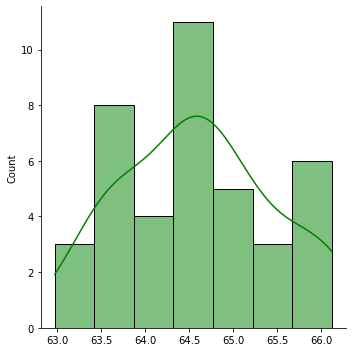

In [47]:
# let's try different sample size here and proportion here to see how the distribution varies
limit_plot(population, 40, 0.2)

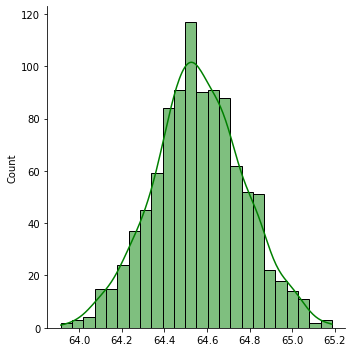

In [49]:
limit_plot(population, 1000, 0.8)

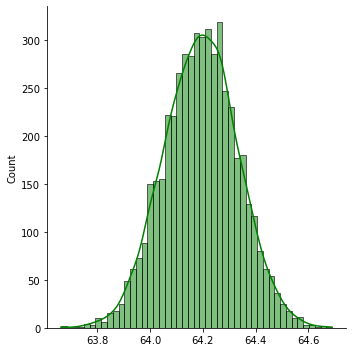

In [34]:
limit_plot(population, 5000, 0.9)

We can see that, the more the sample size, the higher the data tends towards normality

### Confidence Interval

A range computed using sample statistics to estimate an unknown population parameter with a stated level of confidence

Example:
* The statistics professors at a university want to estimate the average statistics anxiety score for all of their undergraduate students. It would be too time consuming and costly to give every undergraduate student at the university their statistics anxiety survey. Instead, they take a random sample of 50 undergraduate students at the university and administer their survey

Using the data collected from the sample, they construct a 95% confidence interval for the mean statistics anxiety score in the population of all university undergraduate students. They are using sample mean to estimate population mean. If the 95% confidence interval for  sample mean is 26 to 32, then we could say, “we are 95% confident that the mean statistics anxiety score of all undergraduate students at this university is between 26 and 32.” In other words, we are 95% confident that population mean is between 26 an 32."

In [50]:
# confidence Interval with N less than 30
anxiety_score = np.random.randint(20, 40, 25)
anxiety_score

array([30, 39, 31, 23, 25, 38, 20, 39, 20, 39, 36, 23, 33, 38, 39, 25, 33,
       30, 39, 37, 28, 20, 38, 33, 26])

In [51]:
import scipy.stats as st

#create 95% confidence interval for population mean weight
CI = st.t.interval(alpha=0.95, df=len(anxiety_score)-1, loc=np.mean(anxiety_score), scale=st.sem(anxiety_score)) 

print(f"We are 95% confident that anxiety score for all undergradutes is between {CI[0]} and {CI[1]}")
print("In other words")
print(f"The 95% confidence interval for the true population mean anxiety is {CI}")

We are 95% confident that anxiety score for all undergradutes is between 28.438807924438617 and 34.12119207556138
In other words
The 95% confidence interval for the true population mean anxiety is (28.438807924438617, 34.12119207556138)


In [52]:
# confidence Interval with N greater than 30

another_score = np.random.randint(20, 40, 50)
CI = st.norm.interval(alpha=0.95, loc=np.mean(another_score), scale=st.sem(another_score))
print(CI)

(28.584686140156215, 31.735313859843785)


### Hypothesis Testing

Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution. 

First, a tentative assumption is made about the parameter or distribution. This assumption is called the null hypothesis and is denoted by H0. An alternative hypothesis (denoted Ha), which is the opposite of what is stated in the null hypothesis, is then defined. The hypothesis-testing procedure involves using sample data to determine whether or not H0 can be rejected. If H0 is rejected, the statistical conclusion is that the alternative hypothesis Ha is true

For example, assume that a radio station selects the music it plays based on the assumption that the average age of its listening audience is 30 years. To determine whether this assumption is valid, a hypothesis test could be conducted with the null hypothesis given as H0: μ = 30 and the alternative hypothesis given as Ha: μ ≠ 30. Based on a sample of individuals from the listening audience, the sample mean age, x̄, can be computed and used to determine whether there is sufficient statistical evidence to reject H0

<img src = "https://miro.medium.com/max/700/1*fEPOHXPQO_ZNJC4UQDXmqw.png" alt = "Null Vs Alternate"/>

#### Level of Significance

Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.
This is normally denoted with alpha(maths symbol ) and generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample.

#### P value

The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true — the definition of ‘extreme’ depends on how the hypothesis is being tested. If your P value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample gives reasonable evidence to support the alternative hypothesis

In [ ]:
# H0: the vaccine is not effective in treating Covid19
# Ha: the vaccine is effective in treating covid19
alpha = 0.05 # 95%
p_value = 0.003 # probabilty calculated

#### Type I error

When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

####  Type II error

When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region